In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
# Define image size and batch size
IMG_SIZE = 224
BATCH_SIZE = 32

In [17]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"yogachandrashris","key":"3333c172b3bdc74d973c087a6a22e60d"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d aryansinghal10/alzheimers-multiclass-dataset-equal-and-augmented

Dataset URL: https://www.kaggle.com/datasets/aryansinghal10/alzheimers-multiclass-dataset-equal-and-augmented
License(s): apache-2.0
 84% 336M/398M [00:02<00:00, 103MB/s]
100% 398M/398M [00:02<00:00, 164MB/s]


In [5]:
!unzip alzheimers-multiclass-dataset-equal-and-augmented.zip

Streaming output truncated to the last 5000 lines.
  inflating: combined_images/VeryMildDemented/a231fefc-359b-40fc-b6aa-db4c3f3b51ac.jpg  
  inflating: combined_images/VeryMildDemented/a2479682-1520-4d4b-a819-0516809393db.jpg  
  inflating: combined_images/VeryMildDemented/a252d5dd-3e86-42c4-83bb-52031cf5b9ff.jpg  
  inflating: combined_images/VeryMildDemented/a2612e5a-c1f2-4781-803c-a6b471ded1b5.jpg  
  inflating: combined_images/VeryMildDemented/a261d715-f3f3-4e30-842a-2e5441f00955.jpg  
  inflating: combined_images/VeryMildDemented/a27aeaaf-b37f-4e15-ab3b-064daa19355b.jpg  
  inflating: combined_images/VeryMildDemented/a27da9a4-1ed4-493f-af81-dd8a3c8adda2.jpg  
  inflating: combined_images/VeryMildDemented/a280d3f6-c18d-424e-8f51-e924f5392c74.jpg  
  inflating: combined_images/VeryMildDemented/a28780ec-8fc0-4d55-9596-0ae2663c6da4.jpg  
  inflating: combined_images/VeryMildDemented/a293bcd0-b371-4120-a3b5-f8c763b0fa95.jpg  
  inflating: combined_images/VeryMildDemented/a296a0bd-4784

In [11]:
#creating training data parameters!
train_datagen =ImageDataGenerator(rescale=1./255,validation_split=0.2)
#creating training data with above parameters and applying transformations!
#folder = parameters.flow_from_directory(path,ts,bs,cm,subset)
train_generator = train_datagen.flow_from_directory('/content/combined_images',target_size=(IMG_SIZE, IMG_SIZE),
 batch_size=BATCH_SIZE,
 class_mode='categorical', subset='training'
)

Found 35200 images belonging to 4 classes.


In [ ]:
val_generator = train_datagen.flow_from_directory(
'/content/combined_images',
 target_size=(IMG_SIZE, IMG_SIZE),
 batch_size=BATCH_SIZE,
 class_mode='categorical',subset='validation'
)

Found 8800 images belonging to 4 classes.


In [12]:
class_indices=train_generator.class_indices
class_name=list(class_indices.keys())
print(class_indices)
print(class_name)

{'MildDemented': 0, 'ModerateDemented': 1, 'NonDemented': 2, 'VeryMildDemented': 3}
['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


In [ ]:
model = keras.Sequential([
 layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(IMG_SIZE, IMG_SIZE, 3)),
 layers.MaxPooling2D((2, 2)),
 layers.Conv2D(64, (3, 3), activation='relu'),
 layers.MaxPooling2D((2, 2)),
 layers.Conv2D(128, (3, 3), activation='relu'),
 layers.MaxPooling2D((2, 2)),
 layers.Flatten(),
 layers.Dense(128, activation='relu'),
 layers.Dense(4, activation='softmax')
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
metrics=['accuracy'])

In [ ]:
model.fit(train_generator, epochs=5, validation_data=val_generator,
batch_size= BATCH_SIZE)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 72s 60ms/step - accuracy: 0.5837 - loss: 0.9164 - val_accuracy: 0.8135 - val_loss: 0.4476
Epoch 2/5
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 76s 69ms/step - accuracy: 0.8753 - loss: 0.3151 - val_accuracy: 0.8813 - val_loss: 0.2863
Epoch 3/5
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 66s 60ms/step - accuracy: 0.9341 - loss: 0.1695 - val_accuracy: 0.9110 - val_loss: 0.2252
Epoch 4/5
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 65s 59ms/step - accuracy: 0.9594 - loss: 0.1083 - val_accuracy: 0.9093 - val_loss: 0.2440
Epoch 5/5
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 75s 68ms/step - accuracy: 0.9701 - loss: 0.0801 - val_accuracy: 0.8925 - val_loss: 0.3312


In [ ]:
model.save('/content/drive/MyDrive/Retinal_ICT_Images/Retinal_Disease_Model.h5')

In [13]:
#Load your model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt #visualisation
import numpy as np
model =load_model('/content/drive/MyDrive/Retinal_ICT_Images/Retinal_Disease_Model.h5')
print("Model Loaded")

Model Loaded


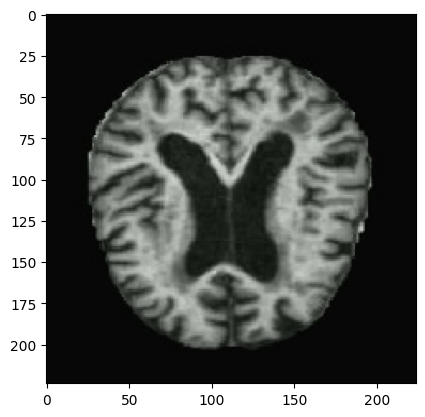

In [14]:
#load and view the test image
test_image_path="/content/combined_images/MildDemented/00046ff7-0fae-4796-9a2b-2df47095bfe6.jpg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [15]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array /= 255.
prediction = model.predict(img_array)
print(prediction)
ind=np.argmax(prediction[0])
print(class_name[ind])

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.6637101]]
MildDemented
